In [2]:
import sys
import os
import datasets
from dotenv import dotenv_values
from pathlib import Path
from scipy.special import softmax
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
cmap = matplotlib.cm.RdYlGn

# take environment variables from .env.
config = dotenv_values("./../../config/.env")
base_path = Path(config["BASE_PATH"])
data_path = base_path/"data"
path_10k = data_path/"raw"/"10k"
path_stoxx = data_path/"raw"/"stoxx"
writing_path = base_path/"writing"/"MSc-Thesis-Emerging-Risks"
table_path = writing_path/"tables"
figure_path = writing_path/"figures"/"plots"

mm = 25.4
textwidth = 149/mm

# plt.rcParams.keys()
aspect =  1.618
width = textwidth*0.9
height = width / aspect
matplotlib.rcParams.update({
    "font.family": 'sans',  # use serif/main font for text elements
    "font.size": 7,
    "text.usetex": False,   # use inline math for ticks
    "pgf.rcfonts": False,   # don't setup fonts from rc parameters
    "pgf.texsystem" : "lualatex",
    "figure.figsize": [width, height]})
cmap = matplotlib.cm.tab10
colors = [cmap(i) for i in range(cmap.N)]


In [3]:
embedding = os.listdir(base_path/'data/evaluation/topic_models')[0]

data_path = base_path/'data/evaluation/topic_models'/embedding

df_master = pd.read_csv(data_path/'topic_evaluation_for_python.csv')

df_risks = pd.read_pickle(base_path/"data/preprocessed"/'df_risk_descriptions.pkl')
df_risks = df_risks.drop("emb_bge_large_en", axis=1)


In [4]:
df_tm = pd.read_pickle(base_path/"Dashboard/topic_models"/embedding/"df.pkl")
df_tm.filing_type = df_tm.filing_type.apply(lambda x: "PDF" if x == ".pdf" else x)
df_tm = df_tm.set_index("Topic")

In [5]:
df = pd.DataFrame()
for file_name in os.listdir(data_path):
    if file_name.split("_")[1] == "topic":
        df = pd.concat([df, pd.read_csv(data_path/file_name).iloc[:-1, :]], axis=0)
        print(file_name)
df_catchall = df[df.Topic==-1]
df = df[df.Topic!=-1]

stats_topics = df.groupby("Topic").agg({"text": "count", "unexpected_loss": "mean", "relatedness_bianchi": "mean", "relatedness_hoyle": "mean"}).rename(columns={"text": "Count"})

30_topic_31.csv
24_topic_126.csv
44_topic_85.csv
0-1_topic_-1_sample_of_30.csv
21_topic_178.csv
51_topic_34.csv
36_topic_49.csv
13_topic_109.csv
52_topic_33.csv
42_topic_98.csv
41_topic_78.csv
33_topic_197.csv
15_topic_139.csv
54_topic_45.csv
1_topic_159.csv
20_topic_135.csv
29_topic_83.csv
48_topic_132.csv
26_topic_184.csv
35_topic_120.csv
38_topic_91.csv


/tmp/ipykernel_148370/4281240930.py:4: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, pd.read_csv(data_path/file_name).iloc[:-1, :]], axis=0)
/tmp/ipykernel_148370/4281240930.py:4: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, pd.read_csv(data_path/file_name).iloc[:-1, :]], axis=0)
/tmp/ipykernel_148370/4281240930.py:4: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, pd.read_csv(data_path/file_name).iloc[:-1, :]], axis=0)
/tmp/ipykernel_148370/4281240930.py:4: FutureWarning: In a future version, object-dtype columns with all-bool values will not be i

11_topic_59.csv
25_topic_201.csv
4_topic_116.csv
7_topic_119.csv
8_topic_155.csv
2_topic_196.csv
5_topic_193.csv
43_topic_148.csv
57_topic_2.csv
10_topic_194.csv
3_topic_161.csv
55_topic_19.csv
17_topic_160.csv
9_topic_162.csv
56_topic_1.csv
50_topic_46.csv
16_topic_97.csv
47_topic_52.csv
32_topic_57.csv
28_topic_53.csv
34_topic_61.csv
37_topic_58.csv


/tmp/ipykernel_148370/4281240930.py:4: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, pd.read_csv(data_path/file_name).iloc[:-1, :]], axis=0)
/tmp/ipykernel_148370/4281240930.py:4: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, pd.read_csv(data_path/file_name).iloc[:-1, :]], axis=0)
/tmp/ipykernel_148370/4281240930.py:4: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, pd.read_csv(data_path/file_name).iloc[:-1, :]], axis=0)
/tmp/ipykernel_148370/4281240930.py:4: FutureWarning: In a future version, object-dtype columns with all-bool values will not be i

0_topic_8.csv
12_topic_81.csv
18_topic_110.csv
45_topic_27.csv
31_topic_127.csv
14_topic_113.csv
53_topic_9.csv
19_topic_143.csv
49_topic_24.csv
6_topic_118.csv
27_topic_150.csv
39_topic_40.csv
23_topic_62.csv
22_topic_30.csv
40_topic_84.csv
46_topic_117.csv


/tmp/ipykernel_148370/4281240930.py:4: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, pd.read_csv(data_path/file_name).iloc[:-1, :]], axis=0)
/tmp/ipykernel_148370/4281240930.py:4: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, pd.read_csv(data_path/file_name).iloc[:-1, :]], axis=0)
/tmp/ipykernel_148370/4281240930.py:4: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, pd.read_csv(data_path/file_name).iloc[:-1, :]], axis=0)
/tmp/ipykernel_148370/4281240930.py:4: FutureWarning: In a future version, object-dtype columns with all-bool values will not be i

# Keyword search and finding report indices

In [12]:
source = ""
kw = "shifti"
year = 2000
df_risks[df_risks.Source.str.lower().str.contains(source)&df_risks.Title.str.lower().str.contains(kw)&(df_risks.Year != year)]

,Title,Description,Year,Source
214,Shifting land use - uncertainties for real est...,Recent decades in the developed markets have w...,2017,Sonar - external
264,Risky bets? Insurance demand in an age of shif...,"Globally, too many people are un- or underinsu...",2019,Sonar - external
265,Shifting litigation regimes,Litigation funding and class actions especiall...,2019,Sonar - external
387,Shifting geopolitical landscape / war risk,Together with a general relative shift of glob...,2016,Other
388,Shifting range of pathogens,Due to the impacts of climate change and an ev...,2016,Other
1009,Shifting Geopolitical Landscape,After the recent period of Western-based liber...,2020,Other
1046,Shifting Range of Pathogens,"Due to the impacts of climate change, trade an...",2020,Other
1056,Shifting Geopolitical Landscape,After the recent period of Western-based liber...,2021,Other
1092,Shifting Range of Pathogens,"Due to the impacts of climate change, trade an...",2021,Other
1101,Shifting Geopolitical Landscape,The recent period of Western-based liberalisat...,2022,Other


In [ ]:
df_risks.loc[11].Title

'Legal actions drive changing claims patterns'

In [ ]:
df_risks.loc[21].Description

"Workplace safety in the western world has increased significantly during the last decades. However, new hazards are still developing. Workplace exposure to organic solvents, for instance, has recently been linked to heart defects in new-borns. The synthetic chemical PFOA, for instance, which is used in products such as lubricants or paper coatings may increase the likelihood of heart disease and stroke. Regulatory changes may also change the risk exposure. In the case of lead, for example, recent studies have shown that blood lead levels below the threshold deemed safe could already cause various health problems. Furthermore, liability may generally become easier to establish for various substances with increased scientific evidence and decreased legal barriers. Demographic shifts also create increasing pressure towards prolonging individuals' work life, which may also increase the detrimental health impacts of toxic substances at the workplace. These developments could have an impact

# Overview Stats

In [6]:
likert_bianchi_map =  {-2: 0, -1: 1, 1:2, 2:3}
print("Descriptiveness:", round(df_master.descriptiveness.apply(lambda x: likert_bianchi_map[x]).mean(), 3))
print("Title Quality:", round(df_master.title_quality.apply(lambda x: likert_bianchi_map[x]).mean(), 3))

Descriptiveness: 2.362
Title Quality: 1.948


In [18]:
df_master.has_cause.value_counts()

0    36
1    22
Name: has_cause, dtype: int64

In [19]:
print("Has Cause percent:", round(df_master.has_cause.mean(), 3) *100)

Has Cause percent: 37.9


In [14]:
df_tm

,report_id,text,n_chunks,n_sentences,n_words,company,filing_type,Year,x,y,probs,Topic_Name,text_wrapped
Topic,,,,,,,,,,,,,
-1,10,"In management's opinion, ICH made significant ...",1,3,105,ICH CORP,10-K,1993,2.972630,5.460554,0.000000,No Topic,"In management's opinion, ICH made significant ..."
39,10,"During the last half of 1993, Philadelphia Ame...",1,1,38,ICH CORP,10-K,1993,3.353310,4.818595,0.823143,"T 39: Mortality, Mortality experience, Indicat...","During the last half of 1993, Philadelphia Ame..."
14,1000,The increased losses resulted from both advers...,1,1,20,LOEWS CORP,10-K,1998,8.771750,4.084311,0.446972,"T 14: Adverse development, Adverse, Satellite,...",The increased losses resulted from both advers...
-1,1002,Just as in 1992 when Mother Nature decided to ...,1,3,83,UNITED FIRE & CASUALTY CO,10-K,1998,5.590752,2.852806,0.000000,No Topic,Just as in 1992 when Mother Nature decided to ...
51,1008,Expenses for 1998 were unusually high primaril...,1,2,48,NATIONAL WESTERN LIFE INSURANCE CO,10-K,1998,3.003181,6.618177,0.661435,"T 51: Tax, Effective, Tax rate, Effective tax",Expenses for 1998 were unusually high primaril...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,gb_prudential-AR_2018,EEV non-operating items Negative short-term fl...,1,1,43,gb_prudential,PDF,2018,0.244307,2.970795,1.000000,"T 104: Negative, Short term, Term fluctuations...",EEV non-operating items Negative short-term fl...
63,nl_ing_grp-AR_2010,As a result of the ongoing and unprecedented v...,1,1,40,nl_ing_grp,PDF,2010,-0.061841,2.034062,0.190004,"T 63: Unprecedented volatility, Ongoing unprec...",As a result of the ongoing and unprecedented v...
63,nl_ing_grp-AR_2011,As a result of the ongoing and unprecedented v...,1,1,40,nl_ing_grp,PDF,2011,0.037348,2.256469,1.000000,"T 63: Unprecedented volatility, Ongoing unprec...",As a result of the ongoing and unprecedented v...


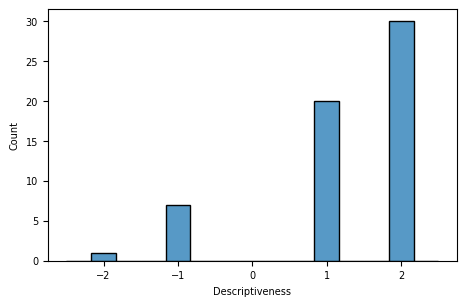

In [31]:
fig, ax = plt.subplots()
g = sns.histplot(
    df_master,
    x="descriptiveness",
    common_norm=False,
    binrange=(-2.5, 2.5), 
    bins=15,
    ax=ax
)
ax.set_xlabel("Descriptiveness")
plt.savefig(figure_path/"tm_descriptiveness.pgf", bbox_inches="tight")
plt.savefig(figure_path/"tm_descriptiveness.png", bbox_inches="tight")

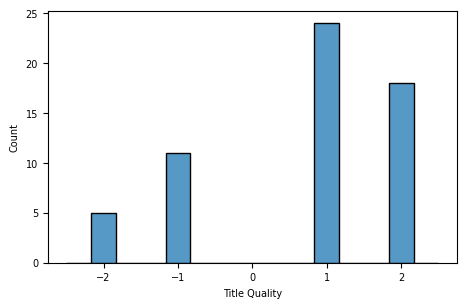

In [30]:
fig, ax = plt.subplots()
g = sns.histplot(
    df_master,
    x="title_quality",
    common_norm=False,
    binrange=(-2.5, 2.5), 
    bins=15,
    ax=ax
)
ax.set_xlabel("Title Quality")
plt.savefig(figure_path/"tm_title_quality.pgf", bbox_inches="tight")
plt.savefig(figure_path/"tm_title_quality.png", bbox_inches="tight")

In [23]:
round(np.corrcoef(df_master.descriptiveness, df_master.title_quality)[0,1],3)

0.675

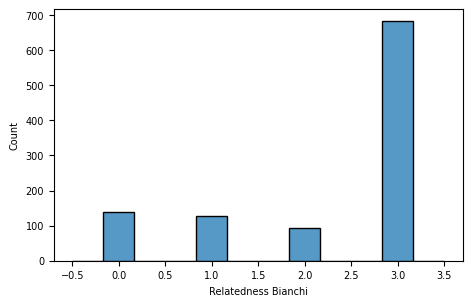

In [71]:
fig, ax = plt.subplots()
g = sns.histplot(
    df[~df.relatedness_bianchi.isna()],
    x="relatedness_bianchi",
    common_norm=False,
    binrange=(-0.5, 3.5), 
    bins=12,
    ax=ax
)
ax.set_xlabel("Relatedness Bianchi")
plt.savefig(figure_path/"tm_relatedness_bianchi_micro.pgf", bbox_inches="tight")
plt.savefig(figure_path/"tm_relatedness_bianchi_micro.png", bbox_inches="tight")

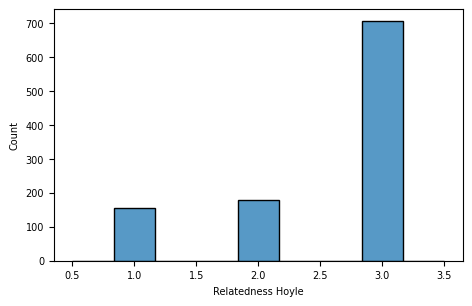

In [70]:
fig, ax = plt.subplots()
g = sns.histplot(
    df[~df.relatedness_hoyle.isna()],
    x="relatedness_hoyle",
    common_norm=False,
    binrange=(0.5, 3.5), 
    bins=9,
    ax=ax
)
ax.set_xlabel("Relatedness Hoyle")
plt.savefig(figure_path/"tm_relatedness_hoyle_micro.pgf", bbox_inches="tight")
plt.savefig(figure_path/"tm_relatedness_hoyle_micro.png", bbox_inches="tight")

In [36]:
round(np.corrcoef(df[df.representative_doc!= True].relatedness_bianchi , df[df.representative_doc!= True].relatedness_hoyle)[0,1], 3)

0.967

In [11]:
row_order = ["Relatedness Bianchi", "Relatedness Hoyle", "Unexpected loss"]

In [83]:
df[["Year", "relatedness_bianchi", "relatedness_hoyle", "unexpected_loss"]].rename(columns={"relatedness_bianchi": "Relatedness Bianchi", "relatedness_hoyle": "Relatedness Hoyle", "unexpected_loss": "Unexpected loss"}).describe()[row_order + ["Year"]].T[["mean","50%", "std", "min", "max"]].rename(columns={"50%": "median"}).style.format("{:0.2f}", subset=["mean", "std", "std"]).format("{:0.0f}", subset=["median","min", "max"]).to_latex(
    table_path/"tm_global_stats_micro.tex",
    position="H",
    caption="Descriptive statistics (micro) of all evaluated topics.",
    label="tab:tm_stats_overview_micro",
    environment="longtable",
    sparse_index=False,
    sparse_columns=False,
    hrules=True)

In [12]:
df_master.rename(columns={
    "relatedness_bianchi": "Relatedness Bianchi", 
    "relatedness_hoyle": "Relatedness Hoyle", 
    "share_unexpected_loss": "Share unexpected loss",
    "descriptiveness": "Title descriptiveness",
    "title_quality": "Title quality",
    "has_cause": "Has cause"}).describe()[["Title descriptiveness", "Title quality"] + row_order[:2] + ["Count"]].T[["mean","50%", "std", "min", "max"]].rename(columns={"50%": "median"}).style.format("{:0.2f}", subset=["mean", "std", "std", "median","min", "max"]).to_latex(
        table_path/"tm_overview_stats_average_macro.tex",
        position="H",
        caption="Descriptive statistics macro average across all evaluated topics",
        label="tab:tm_stats_overview_macro",
        environment="longtable",
        sparse_index=False,
        sparse_columns=False,
        hrules=True)

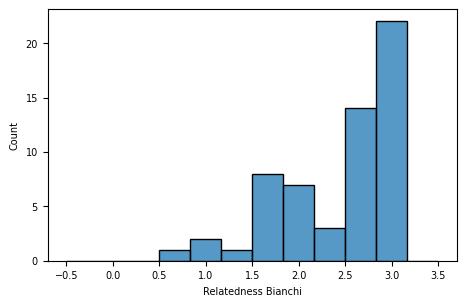

In [84]:
fig, ax = plt.subplots()
g = sns.histplot(
    stats_topics[~stats_topics.relatedness_bianchi.isna()],
    x="relatedness_bianchi",
    common_norm=False,
    binrange=(-0.5, 3.5), 
    bins=12,
    ax=ax
)
ax.set_xlabel("Relatedness Bianchi")
plt.savefig(figure_path/"tm_relatedness_bianchi_macro.pgf", bbox_inches="tight")
plt.savefig(figure_path/"tm_relatedness_bianchi_macro.png", bbox_inches="tight")

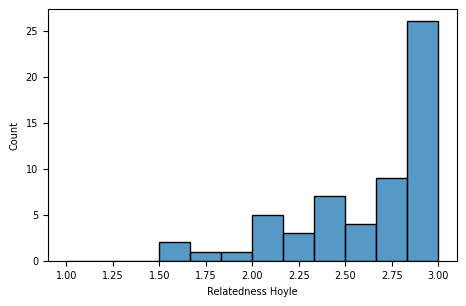

In [62]:
fig, ax = plt.subplots()
g = sns.histplot(
    stats_topics[~stats_topics.relatedness_hoyle.isna()],
    x="relatedness_hoyle",
    common_norm=False,
    binrange=(1, 3), 
    bins=12,
    ax=ax
)
ax.set_xlabel("Relatedness Hoyle")
plt.savefig(figure_path/"tm_relatedness_hoyle_macro.pgf", bbox_inches="tight")
plt.savefig(figure_path/"tm_relatedness_hoyle_macro.png", bbox_inches="tight")

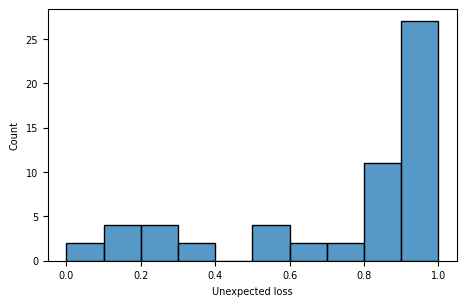

In [65]:
fig, ax = plt.subplots()
g = sns.histplot(
    stats_topics[~stats_topics.unexpected_loss.isna()],
    x="unexpected_loss",
    common_norm=False,
    binrange=(0, 1), 
    bins=10,
    ax=ax
)
ax.set_xlabel("Unexpected loss")
plt.savefig(figure_path/"tm_unexpected_loss_macro.pgf", bbox_inches="tight")
plt.savefig(figure_path/"tm_unexpectd_loss_macro.png", bbox_inches="tight")

In [69]:
df_catchall[["Year", "relatedness_bianchi", "relatedness_hoyle", "unexpected_loss"]].rename(columns={"relatedness_bianchi": "Relatedness Bianchi", "relatedness_hoyle": "Relatedness Hoyle", "unexpected_loss": "Unexpected loss"}).describe()[row_order + ["Year"]].T[["mean","50%", "std", "min", "max"]].rename(columns={"50%": "median"}).style.format("{:0.2f}", subset=["mean", "std", "std"]).format("{:0.0f}", subset=["median","min", "max"]).to_latex(
    table_path/"tm_catchall_stats.tex",
    position="H",
    caption="Descriptive statistics (micro) of a sample of 30 paragraphs (including the 4 representative documents) from the catchall/unassigned cluster.",
    label="tab:tm_catchall_stats",
    environment="longtable",
    sparse_index=False,
    sparse_columns=False,
    hrules=True)

# Automatically create subsections

In [82]:
master = stats_topics.join(df_master.set_index("Topic"), how="left", rsuffix="_master")

In [83]:
tm_df = pd.read_pickle(base_path/'Dashboard/topic_models'/"emb_bge_large_en_8"/"tm_df.pkl")
tm_df = tm_df.set_index("Topic")
df_risks = pd.read_pickle(base_path/'Dashboard/topic_models'/"emb_bge_large_en_8"/"df_risks.pkl")

eval_topics = [8, 161, 193, 194, 59, 139, 143, 135, 30, 53, 83, 57, 197, 40, 84, 85, 117, 34, 45, 19]
dff = df_master[df_master.Topic.isin(eval_topics)].drop(["relatedness_hoyle", "relatedness_bianchi"], axis=1).set_index("Topic").join(df.set_index("Topic").drop(["comment", "y", "Unnamed: 8"], axis = 1), how="left", rsuffix="_master")

dff["related"] = (dff.relatedness_hoyle > 2) & (dff.relatedness_bianchi > 1)| dff.representative_doc
dff["belonging"] = dff.apply(lambda x: "related \\& ul" if x.related and x.unexpected_loss > 0.5 else ("not ul" if x.related else ("not related" if x.unexpected_loss > 0.5 else "neither related or ul")), axis=1)
extract_list = lambda x: [i for i in x.split(",") if i not in["", " "]  ] if type(x) == str else []
df_master.top_10_risks_index = df_master.top_10_risks_index.apply(lambda x: [int(i) for i in extract_list(x)])
df_master.related_risks_index = df_master.related_risks_index.apply(lambda x: [int(i) for i in extract_list(x)])
df_master.keywords = df_master.keywords.apply(extract_list)

dm = df_master[df_master.Topic.isin(eval_topics)].drop(["relatedness_hoyle", "relatedness_bianchi"], axis=1).set_index("Topic")


### Templates

In [84]:
topic_template = """
\\subsection{{{topic_name}}}\\label{{subsec:topic_{topic_number}}}
    {risk_description}

    {figure}

    {risk_comments}
    
    {quotes}

    {representative_docs}
"""

representative_document_template = """
\\begin{{itemize}}
    \\item {}
    \\item {}
    \\item {}
\\end{{itemize}}
"""

super_figure_teplate = """
\\begin{{figure}}[H]
    \\centering
    \\begin{{subfigure}}[t]{{0.65\\textwidth}}
        \\begin{{center}}
            \\resizebox{{\\textwidth}}{{!}}{{\\inputpgf{{./figures/plots/topics}}{{topic_{topic}_time.pgf}}}}
        \\end{{center}}
        \\caption{{{caption}}}
    \end{{subfigure}}
    \\begin{{subfigure}}[t]{{0.34\\textwidth}}
        \\begin{{subfigure}}[t]{{0.9\\textwidth}}
            \\begin{{subfigure}}[t]{{\\linewidth}}
                \\begin{{center}}
                    \\resizebox{{\\linewidth}}{{!}}{{\\inputpgf{{./figures/plots/topics}}{{topic_{topic}_words.pgf}}}}
                \\caption{{Top n-grams}}
                \\end{{center}}
            \end{{subfigure}}
            \\begin{{subfigure}}[t]{{\\linewidth}}
                \\includegraphics[width=\\linewidth]{{figures/plots/topics/topic_{topic}_filing_shares.png}}
                \\caption{{Share of related unexpected losses by filing and company}}
            \end{{subfigure}}
        \end{{subfigure}}
    \end{{subfigure}}
    \\caption{{Overview of cluster {cluster_name}}}
    \\label{{{label}}}
\\end{{figure}}"""

In [85]:
risk_source_map = {
    'Sonar - external': "SRS",
    'World Economic Forum (WEF) Global Risks Report': "WEF",
    'Other': "OTH",
    'Allianz Risk Barometer': "ARB",
    'Insurance Banana Skins': "IBS",
    'Eurasia Group': "EUR", 
    'GESDA': "GES",
 }

In [86]:
df_risks.Source = df_risks.Source.apply(lambda x: risk_source_map[x])

### Stitching stuff together

In [87]:
all_topic_files = ""
for topic in eval_topics:
    dfff = dff.loc[topic]
    start_year = dfff[dfff.belonging == "related \\& ul"].Year.min()
    matplotlib.rcParams.update({
        "font.family": 'sans',  # use serif/main font for text elements
        "font.size": 7,
        "text.usetex": False,   # use inline math for ticks
        "pgf.rcfonts": False,   # don't setup fonts from rc parameters
        "pgf.texsystem" : "lualatex",
        "figure.figsize": [0.65*width, 0.65*height]})
    fig, ax = plt.subplots()
    # ax.axvline(x=dfff.Year.mean(), color="black", linestyle=":", linewidth=1)
    g = sns.histplot(dfff, 
                     x="Year", 
                     hue="belonging",
                     hue_order=["related \\& ul", "not related", "not ul", "neither related or ul"],
                     multiple="stack",
                     ax=ax, 
                     binrange=(1993.25, 2020.25), 
                     bins=27*2+1)
    #ax.set_xlim((1994, 2021))
    y_min, y_max = ax.get_ylim()
    footnote = {}
    if dm.loc[topic].top_10_risks_index:
        dr = df_risks.loc[dm.loc[topic].top_10_risks_index].sort_values(by="Year", ascending=True)
        years = set(dr.Year.unique())
        for i, year in enumerate(dr.Year.unique()):
            if year < start_year:
                ax.axvline(x=year, color="red", linestyle="-", linewidth=1)
                ax.text(year-0.4, y_max*1.02, f"[{i}]", color="red", fontsize=7)
            else:
                ax.axvline(x=year, color="black", linestyle="-", linewidth=1)
                ax.text(year-0.4, y_max*1.02, f"[{i}]", color="black", fontsize=7)
            footnotes = [f"{source}{str(year)[2:]}: \\emph{{{title}}}" for title, source in zip(dr[dr.Year==year].Title.values, dr[dr.Year==year].Source.values)]
            footnotes =[f.replace("$", "\\$").replace("%", "\\%").replace("&", "\\&") for f in footnotes]
            footnote[year] = f"[{i}] {'; '.join(footnotes)}"
    else:
        years = set([])
    if dm.loc[topic].related_risks_index:
        dr = df_risks.loc[dm.loc[topic].related_risks_index].sort_values(by="Year", ascending=True)
        new_years = set(dr.Year.unique()) - years
        for i, year in enumerate(dr.Year.unique(), start = len(years)):
            if year in new_years:
                if year < start_year:
                    ax.axvline(x=year, color="red", linestyle="--", linewidth=1)
                    ax.text(year-0.4, y_max*1.02, f"[{i}]", color="red", fontsize=7)
                else:
                    ax.axvline(x=year, color="black", linestyle="--", linewidth=1)
                    ax.text(year-0.4, y_max*1.02, f"[{i}]", color="black", fontsize=7)
            footnotes = [f"{source}{str(year)[2:]}: \\emph{{{title}}}" for title, source in zip(dr[dr.Year==year].Title.values, dr[dr.Year==year].Source.values)]
            footnotes =[f.replace("$", "\\$").replace("%", "\\%").replace("&", "\\&") for f in footnotes]
            if year in footnote.keys():
                footnote[year] = f"{footnote[year]}; {'; '.join(footnotes)}"
            else:
                footnote[year] = f"[{i}] {'; '.join(footnotes)}"
    ax.set_ylabel("Count")
    ax.set_xticks(range(1994, 2020, 1), minor=True)
    leg = ax.get_legend()
    leg.set_title("")
    plt.savefig(figure_path/f"topics/topic_{topic}_time.pgf")
    if dm.loc[topic].keywords:
        keywords = f"\\textbf{{Keywords searched for (dahed lines):}} {'; '.join(dm.loc[topic].keywords)}"
    else:
        keywords = " "
    figure = super_figure_teplate.format(
        topic=topic, 
        caption=f"{' '.join([x for x in footnote.values()])} {keywords}",
        cluster_name= dm.loc[topic].given_name,
        label=f"fig:topic_{topic}_time")
    with open(writing_path/f"figures/topics/topic_{topic}_time.tex", "w") as f:
        f.write(figure)
    rep_docs = [x.replace("$", "\\$").replace("%", "\\%").replace("&", "\\&") for x in  dfff[dfff.representative_doc==True].text.to_list()]
    if dm.loc[topic].quotes:
        quotes = f"\\paragraph{{Quotes:}} {dm.loc[topic].quotes}"
    else:
        quotes = ""
    topic_file = topic_template.format(
            topic_name=dm.loc[topic].given_name,
            topic_number=topic,
            risk_description=f"\\paragraph{{Risk Description:}} {dm.loc[topic].description}",
            figure=f"\\input{{./figures/topics/topic_{topic}_time.tex}}",
            representative_docs="\\paragraph{Representative Documents:}" + representative_document_template.format(rep_docs[0], rep_docs[1], rep_docs[2]),
            risk_comments=f"\\paragraph{{Summary:}} {dm.loc[topic].risks_comment}",
            quotes=quotes
        )
    with open(writing_path/f"sections/05_Results/topics/topic_{topic}.tex", "w") as f:
        f.write(topic_file)
    all_topic_files += f"\\input{{./sections/05_Results/topics/topic_{topic}.tex}}\n \\newpage \n"
    matplotlib.rcParams.update({
        "font.family": 'sans',  # use serif/main font for text elements
        "font.size": 6,
        "text.usetex": False,   # use inline math for ticks
        "pgf.rcfonts": False,   # don't setup fonts from rc parameters
        "pgf.texsystem" : "lualatex",
        "figure.figsize": [height*0.5*0.8, width*0.5*0.8]})
    fig, ax = plt.subplots()
    top_words = pd.DataFrame(tm_df.loc[topic]["Top_Words"]).sort_values(by=1)
    p = top_words.set_index(0).plot(kind="barh", ax=ax)
    ax.tick_params(axis='y', direction='in',pad=-7)
    ax.set_yticklabels(top_words[0].tolist(), horizontalalignment = "left")
    p.legend().remove()
    p.set_ylabel(" ")
    plt.savefig(figure_path/f"topics/topic_{topic}_words.pgf")
    matplotlib.rcParams.update({
        "font.family": 'sans',  # use serif/main font for text elements
        "font.size": 7,
        "text.usetex": False,   # use inline math for ticks
        "pgf.rcfonts": False,   # don't setup fonts from rc parameters
        "pgf.texsystem" : "lualatex",
        "figure.figsize": [width, height]})
    print(topic)
    texts = dfff[dfff.belonging == "related \\& ul"].text.tolist()
    fig = px.sunburst(
        df_tm[df_tm.text.isin(texts)].loc[topic], 
        path=['filing_type', 'company'],
        color='filing_type',
        height=500,
        width=500,
        color_discrete_map={"PDF": "#ff7f0e", "10-K": "#1f77b4"})
    fig.write_image(figure_path/f"topics/topic_{topic}_filing_shares.png")
    matplotlib.pyplot.close("all")
with open(writing_path/f"sections/05_Results/all_topics.tex", "w") as f:
    f.write(all_topic_files)


8
161
193
194
59
139
143
135
30
53
83
57
197
40
84
85
117
34
45
19


# Table Styling

In [39]:
cmap = matplotlib.cm.RdYlGn

In [61]:
column_name_map = {
    "descriptiveness": "Desc.",
    "title_quality": "Qual.",
    "relatedness_bianchi": "Rel. B",
    "relatedness_hoyle": "Rel. H",
    "share_unexpected_loss": "\\% UL",
    "has_cause": "Has cause",
    "Count": "\\#"
}

In [66]:
df_master.share_unexpected_loss = df_master.share_unexpected_loss.round(2)*100
df_master.Name = df_master.Name.apply(lambda x: x.split(": ")[1])
df_master["selected"] = df_master.apply(lambda x: (x.has_cause *x.share_unexpected_loss) >50 , axis=1)
df_master = df_master.set_index("Topic").sort_values(by="Count", ascending=False)
df_master.loc[8, "selected"] = True
df_master.loc[34, "selected"] = True

In [53]:
cmap= sns.diverging_palette(10, 140, s=100, l=50, center="dark", as_cmap=True)

In [87]:
df_master[["Name", "title_quality", "descriptiveness", "relatedness_hoyle", "relatedness_bianchi", "share_unexpected_loss", "has_cause", "Count"]].rename(columns=column_name_map).style.text_gradient(cmap=cmap, subset=["Desc.", "Qual.", "Rel. B", "Rel. H", "\\% UL", "Has cause"]).text_gradient(cmap=cmap, gmap=df_master.selected, subset=["Name"] ).format(precision=1).to_latex(
    table_path/"topic_evaluation.tex", 
    position="H",
    caption="Overview of topics with peak after 2012. Qual. = Title Quality, Desc. = Title Descriptiveness, Rel. B = Average of Relatedness Bianchi, Rel. H = Average of Relatedness Hoyle, \\% UL = Share of Unexpected Loss. Topic names are colored according to whether the topic was selected (green) for further analysis.",
    label="tab:tm_overview",
    environment="longtable",
    column_format="P{0.9cm}|P{4.5cm}P{0.9cm}P{0.9cm}P{0.8cm}P{0.8cm}P{0.85cm}P{1cm}P{0.4cm}",
    sparse_index=False,
    sparse_columns=False,
    convert_css=True,
    hrules=True)